In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [25]:
import requests
import pandas as pd
from datetime import datetime

class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        self.data = {}

    def get_data(self, script):
        self.fetch_intraday_data(script)
        self.convert_intraday_data(script)
        return self.__getitem__(script)
    
    def fetch_intraday_data(self, script):
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=1min&apikey={self.api_key}"
        response = requests.get(url)
        if response.status_code == 200:
            self.data[script] = response.json()
        else:
            print(f"Failed to fetch data for {script}")
    
    def convert_intraday_data(self, script):
        if script not in self.data:
            print(f"Data not available for {script}")
            return
        
        data = self.data[script]["Time Series (1min)"]
        df = pd.DataFrame(data).T
        df.index = pd.to_datetime(df.index)
        df["timestamp"] = df.index
        df=df.reset_index()
        df.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low", "4. close": "close", "5. volume": "volume"}, inplace=True)
        df = df.astype({"open": float, "high": float, "low": float, "close": float, "volume": int})
        self.data[script]["df"] = df
        return df
    
    def __getitem__(self, script):
        if script not in self.data:
            print(f"Data not available for {script}")
            return
        return self.data[script]["df"]
    
    def __setitem__(self, script, df):
        self.data[script] = {"df": df}
    
    def __contains__(self, script):
        return script in self.data



In [26]:
api_key = "8Q7PGY4MNL4PSFX9"
script_data = ScriptData(api_key)
script_data.fetch_intraday_data('GOOGL')
script_data.convert_intraday_data('GOOGL')
script_data['GOOGL']

,index,open,high,low,close,volume,timestamp
0,2023-02-15 20:00:00,97.10,97.11,97.10,97.10,1470,2023-02-15 20:00:00
1,2023-02-15 19:59:00,97.12,97.12,97.12,97.12,684,2023-02-15 19:59:00
2,2023-02-15 19:58:00,97.12,97.12,97.12,97.12,1298,2023-02-15 19:58:00
3,2023-02-15 19:57:00,97.10,97.12,97.10,97.12,1047,2023-02-15 19:57:00
4,2023-02-15 19:56:00,97.12,97.12,97.10,97.10,806,2023-02-15 19:56:00
...,...,...,...,...,...,...,...
95,2023-02-15 18:01:00,96.90,96.95,96.89,96.94,6472,2023-02-15 18:01:00
96,2023-02-15 18:00:00,96.90,96.90,96.90,96.90,585,2023-02-15 18:00:00
97,2023-02-15 17:59:00,96.90,96.91,96.90,96.91,760,2023-02-15 17:59:00
98,2023-02-15 17:58:00,96.93,96.93,96.93,96.93,122,2023-02-15 17:58:00


In [27]:
script_data.fetch_intraday_data('AAPL')
script_data.convert_intraday_data('AAPL')
script_data['AAPL']

,index,open,high,low,close,volume,timestamp
0,2023-02-15 20:00:00,155.51,155.5100,155.48,155.4800,7147,2023-02-15 20:00:00
1,2023-02-15 19:59:00,155.50,155.5100,155.49,155.5100,3725,2023-02-15 19:59:00
2,2023-02-15 19:58:00,155.48,155.5000,155.48,155.4901,1386,2023-02-15 19:58:00
3,2023-02-15 19:57:00,155.49,155.5000,155.49,155.4900,1288,2023-02-15 19:57:00
4,2023-02-15 19:56:00,155.48,155.4800,155.48,155.4800,690,2023-02-15 19:56:00
...,...,...,...,...,...,...,...
95,2023-02-15 17:12:00,155.29,155.2900,155.29,155.2900,120,2023-02-15 17:12:00
96,2023-02-15 17:10:00,155.29,155.2900,155.29,155.2900,359,2023-02-15 17:10:00
97,2023-02-15 17:08:00,155.29,155.2900,155.29,155.2900,275,2023-02-15 17:08:00
98,2023-02-15 17:07:00,155.30,155.3085,155.30,155.3085,283,2023-02-15 17:07:00


In [28]:
'GOOGL' in script_data

True

In [29]:
'AAPL' in script_data

True

In [30]:
'NVDA' in script_data

False

In [31]:
def indicator1(df, timeperiod):
    df['indicator'] = df['close'].rolling(timeperiod).mean()
    return df[['timestamp', 'indicator']]

In [32]:
indicator1(script_data['GOOGL'],timeperiod=5)

,timestamp,indicator
0,2023-02-15 20:00:00,NaN
1,2023-02-15 19:59:00,NaN
2,2023-02-15 19:58:00,NaN
3,2023-02-15 19:57:00,NaN
4,2023-02-15 19:56:00,97.112
...,...,...
95,2023-02-15 18:01:00,96.954
96,2023-02-15 18:00:00,96.940
97,2023-02-15 17:59:00,96.930
98,2023-02-15 17:58:00,96.928


In [33]:
indicator1(script_data['AAPL'],timeperiod=5)

,timestamp,indicator
0,2023-02-15 20:00:00,NaN
1,2023-02-15 19:59:00,NaN
2,2023-02-15 19:58:00,NaN
3,2023-02-15 19:57:00,NaN
4,2023-02-15 19:56:00,155.49002
...,...,...
95,2023-02-15 17:12:00,155.27200
96,2023-02-15 17:10:00,155.28000
97,2023-02-15 17:08:00,155.28800
98,2023-02-15 17:07:00,155.29370


In [34]:
# pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [40]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

class Strategy:
    def __init__(self, api_key):
        self.api_key = api_key
    
    def generate_signals(self, script):
        # Fetch intraday historical data using ScriptData class
        sd = ScriptData(self.api_key)
        sd.fetch_intraday_data(script)
        df = sd.convert_intraday_data(script)
        close_data = df['close']
        
        # Compute indicator data on 'close' of 'df' using indicator1 function
        indicator_data = indicator1(df, 5)['indicator']
        
        # Generate signals DataFrame
        signals = pd.DataFrame({'timestamp': df['timestamp'], 'signal': 'NO_SIGNAL'})
        signals.loc[indicator_data > close_data, 'signal'] = 'BUY'
        signals.loc[indicator_data < close_data, 'signal'] = 'SELL'
        
        # Print signals DataFrame
        buy_sell_signals = signals[(signals['signal'] == 'BUY') | (signals['signal'] == 'SELL')]
        print(pd.DataFrame(buy_sell_signals))
        
        # Plot candlestick chart of 'df' and 'indicator'
        ohlc = df[['timestamp', 'open', 'high', 'low', 'close']]
        ohlc['timestamp'] = pd.to_datetime(ohlc['timestamp'])
        ohlc['timestamp'] = ohlc['timestamp'].apply(mdates.date2num)
        fig, ax = plt.subplots(figsize=(15,10))
        candlestick_ohlc(ax, ohlc.values, width=0.0005, colorup='g', colordown='r')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        ax.plot(df['timestamp'], indicator_data, color='grey')
        plt.show()

    def get_script_data(self, script):
        # Fetch intraday historical data using ScriptData class
        sd = ScriptData(self.api_key)
        sd.fetch_intraday_data(script)
        df = sd.convert_intraday_data(script)
        return df


In [41]:
strategy= Strategy('NVDA')

In [42]:
strategy.get_script_data('NVDA')

,index,open,high,low,close,volume,timestamp
0,2023-02-15 20:00:00,228.0000,228.1400,228.00,228.14,2712,2023-02-15 20:00:00
1,2023-02-15 19:59:00,228.0000,228.0000,228.00,228.00,670,2023-02-15 19:59:00
2,2023-02-15 19:58:00,228.0600,228.0600,228.00,228.00,1203,2023-02-15 19:58:00
3,2023-02-15 19:56:00,228.1800,228.1800,228.15,228.15,1010,2023-02-15 19:56:00
4,2023-02-15 19:54:00,228.1000,228.2200,228.10,228.22,2335,2023-02-15 19:54:00
...,...,...,...,...,...,...,...
95,2023-02-15 17:24:00,227.4000,227.4000,227.40,227.40,280,2023-02-15 17:24:00
96,2023-02-15 17:23:00,227.4000,227.4000,227.40,227.40,310,2023-02-15 17:23:00
97,2023-02-15 17:21:00,227.3009,227.3009,227.30,227.30,350,2023-02-15 17:21:00
98,2023-02-15 17:20:00,227.3500,227.3500,227.35,227.35,183,2023-02-15 17:20:00


             timestamp signal
4  2023-02-15 19:54:00   SELL
5  2023-02-15 19:53:00   SELL
6  2023-02-15 19:52:00    BUY
7  2023-02-15 19:51:00    BUY
8  2023-02-15 19:50:00    BUY
..                 ...    ...
95 2023-02-15 17:24:00    BUY
96 2023-02-15 17:23:00    BUY
97 2023-02-15 17:21:00    BUY
98 2023-02-15 17:20:00    BUY
99 2023-02-15 17:15:00    BUY

[95 rows x 2 columns]


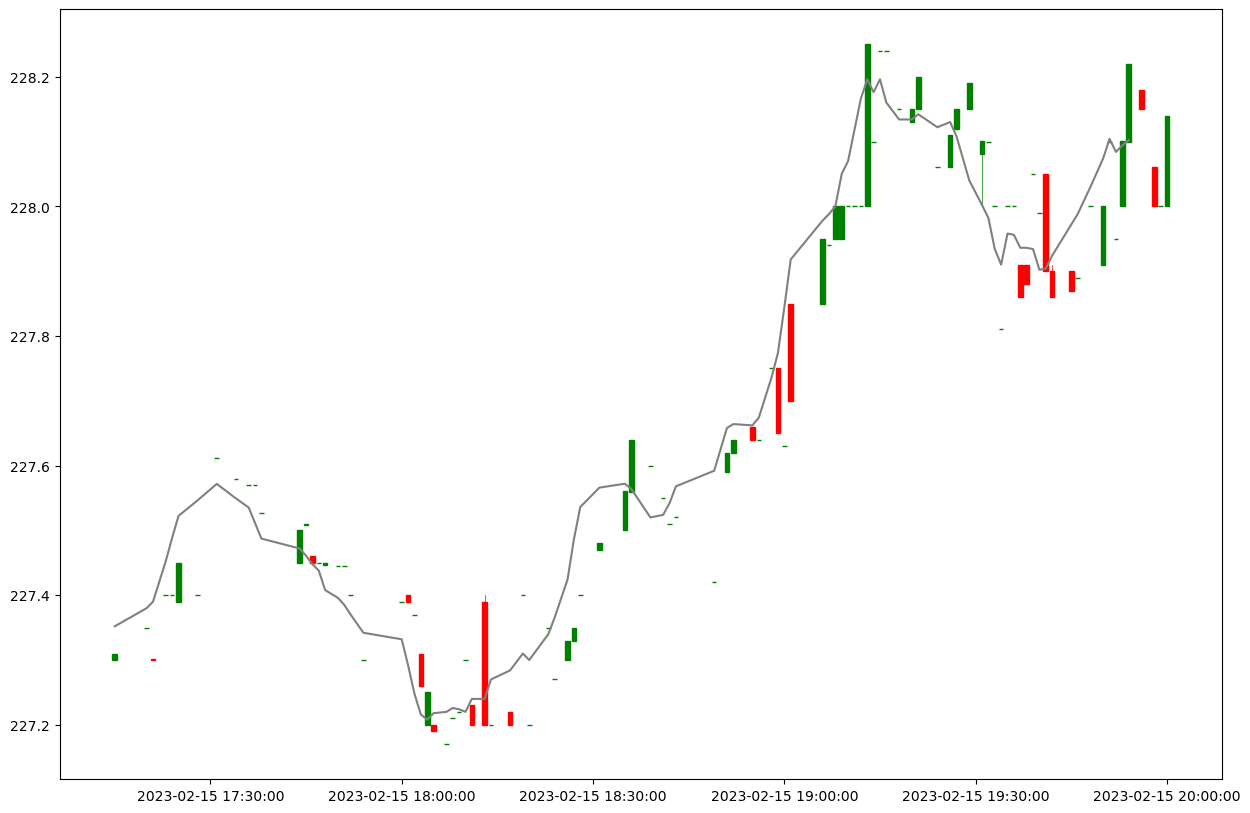

In [43]:
strategy.generate_signals('NVDA')

In [49]:
pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
alpha-vantage                 2.3.1
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea